In [86]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [87]:
pip install category-encoders

In [88]:
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [89]:
df = pd.read_csv("card_transdata.csv")

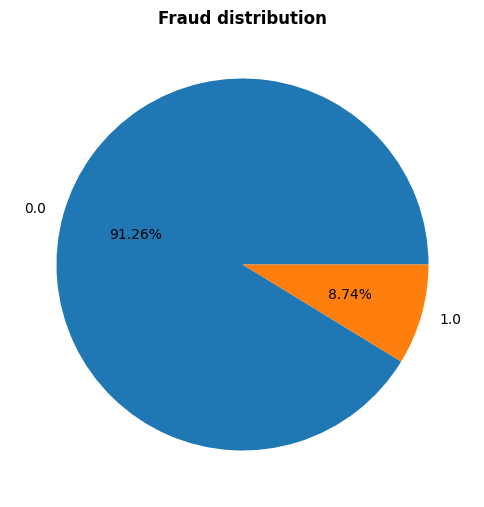

In [104]:
plt.figure(figsize = (6, 8))
plt.pie(x = df['fraud'].value_counts().values,
        labels = df['fraud'].value_counts().index,
        autopct = '%1.2f%%')
plt.title('Fraud distribution', size = 12, weight = 'bold')
plt.show()

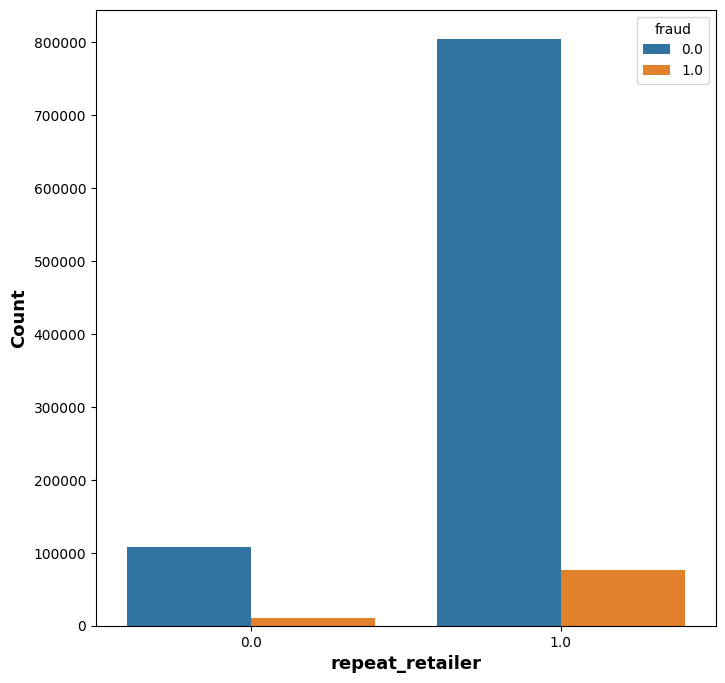

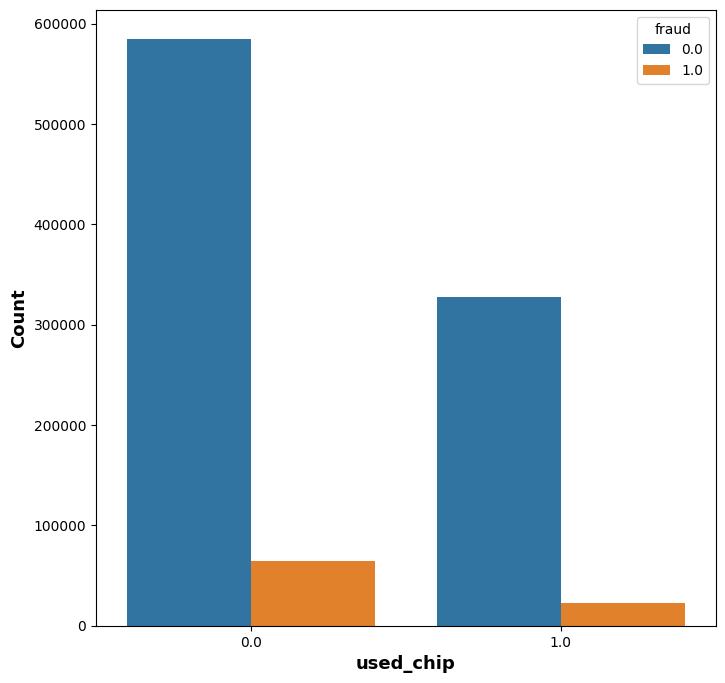

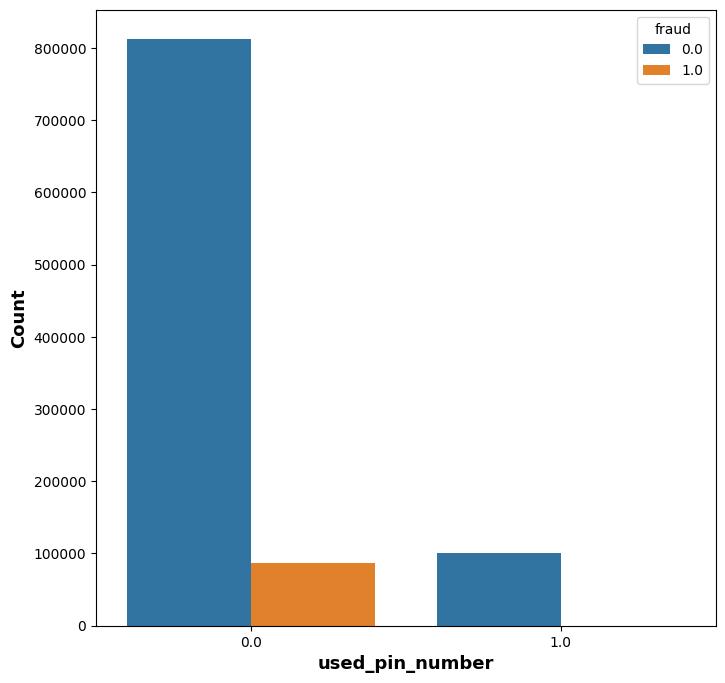

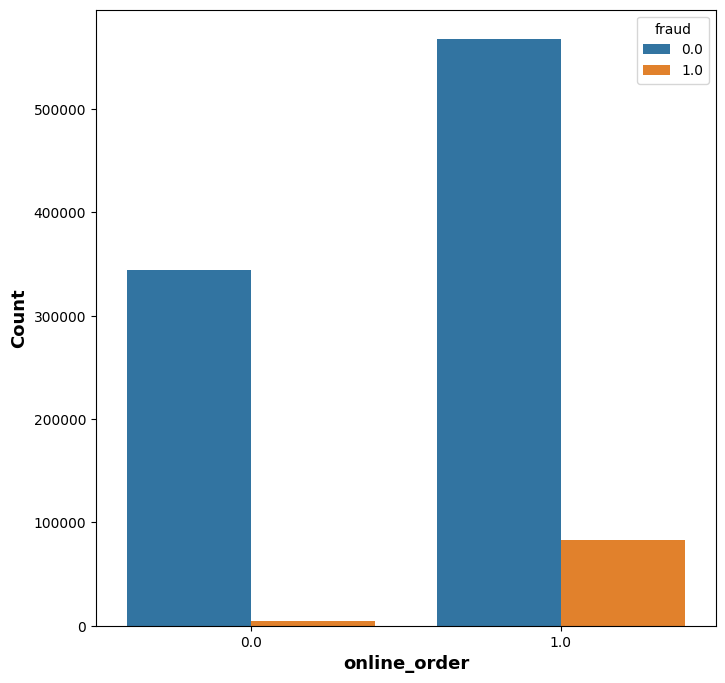

In [107]:
categorical_columns = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']
for i, col in enumerate(categorical_columns):
    plt.figure(figsize = (8, 8))

    sns.countplot(
        data = df,
        x = col,
        hue = 'fraud',
    )
    plt.xlabel(col, size = 13, weight = 'bold')
    plt.ylabel('Count', size = 13, weight = 'bold')
    plt.show()

<ipython-input-91-acc8a43d7080>:17: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

<ipython-input-91-acc8a43d7080>:27: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

<ipython-input-91-acc8a43d7080>:35: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



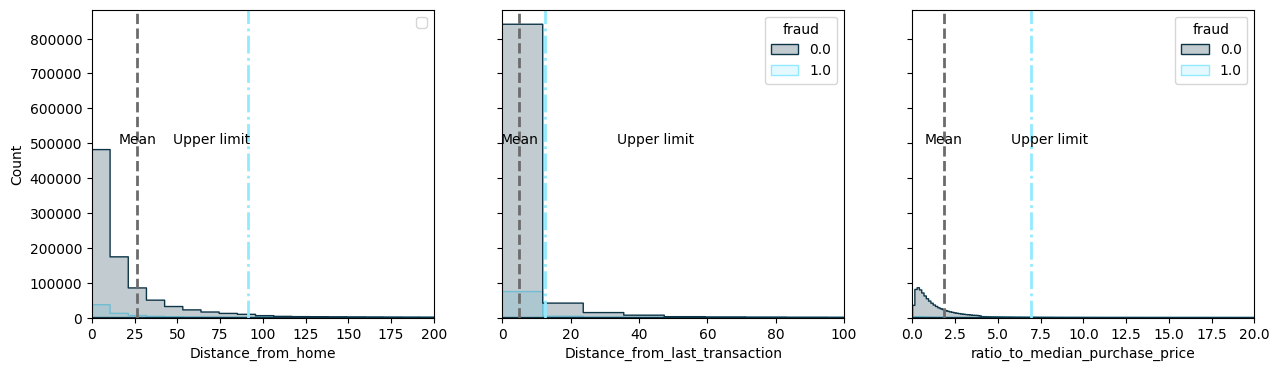

In [91]:
import numpy as np
def value_iqr(df, variable):
      q1 = round(df[variable].quantile(q = 0.25),2)
      q3 = round(df[variable].quantile(q = 0.75), 2)
      IQR = q3 - q1

      upper_limit = round(q3 + 3 * IQR , 2)
      return upper_limit

upper_limit_distance_from_home = value_iqr(df, "distance_from_home")
upper_limit_distance_from_last_transaction = value_iqr(df, "distance_from_last_transaction")
upper_limit_ratio_to_median_purchase_price = value_iqr(df, "ratio_to_median_purchase_price")

colors = ["#0E3547", "#92EAFF", "#6B6B6B"]

fig, ax = plt.subplots(1, 3, figsize=(15,4), sharey=True)
sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
ax[0].set_xlim(0, 200)
ax[0].axvline(np.mean(df["distance_from_home"]), linewidth=2, color=colors[2], linestyle='--')
ax[0].axvline(upper_limit_distance_from_home, linewidth=2, color=colors[1], linestyle='-.')
ax[0].annotate("Mean", (np.mean(df["distance_from_home"]),  500000), ha='center')
ax[0].annotate("Upper limit", (70,  500000), ha='center')
ax[0].set_xlabel("Distance_from_home")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
ax[1].set_xlabel("Distance_from_last_transaction")
ax[1].set_xlim(0, 100)
ax[1].axvline(np.mean(df["distance_from_last_transaction"]), linewidth=2, color=colors[2], linestyle='--')
ax[1].annotate("Mean", (np.mean(df["distance_from_last_transaction"]),  500000), ha='center')
ax[1].axvline(upper_limit_distance_from_last_transaction , linewidth=2, color=colors[1], linestyle='-.')
ax[1].annotate("Upper limit", (45,  500000), ha='center')

sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0], hue="fraud", ax=ax[2],  element="step", palette=colors)
ax[2].set_xlabel("ratio_to_median_purchase_price")
ax[2].set_xlim(0, 20)
ax[2].axvline(np.mean(df["ratio_to_median_purchase_price"]), linewidth=2, color=colors[2], linestyle='--')
ax[2].annotate("Mean", (np.mean(df["ratio_to_median_purchase_price"]),  500000), ha='center')
ax[2].axvline( upper_limit_ratio_to_median_purchase_price , linewidth=2, color=colors[1], linestyle='-.')
ax[2].annotate("Upper limit", (8,  500000), ha='center')

plt.subplots_adjust(wspace=0.2)
plt.show()

# The largest number of records for the distance_from_home variable are found within a distance of less than 100 miles.
# The largest number of records for the Distance_from_last_transaction variable are within a distance of less than 50 miles.
# A similar distribution is observed between fraud and non-fraud labels

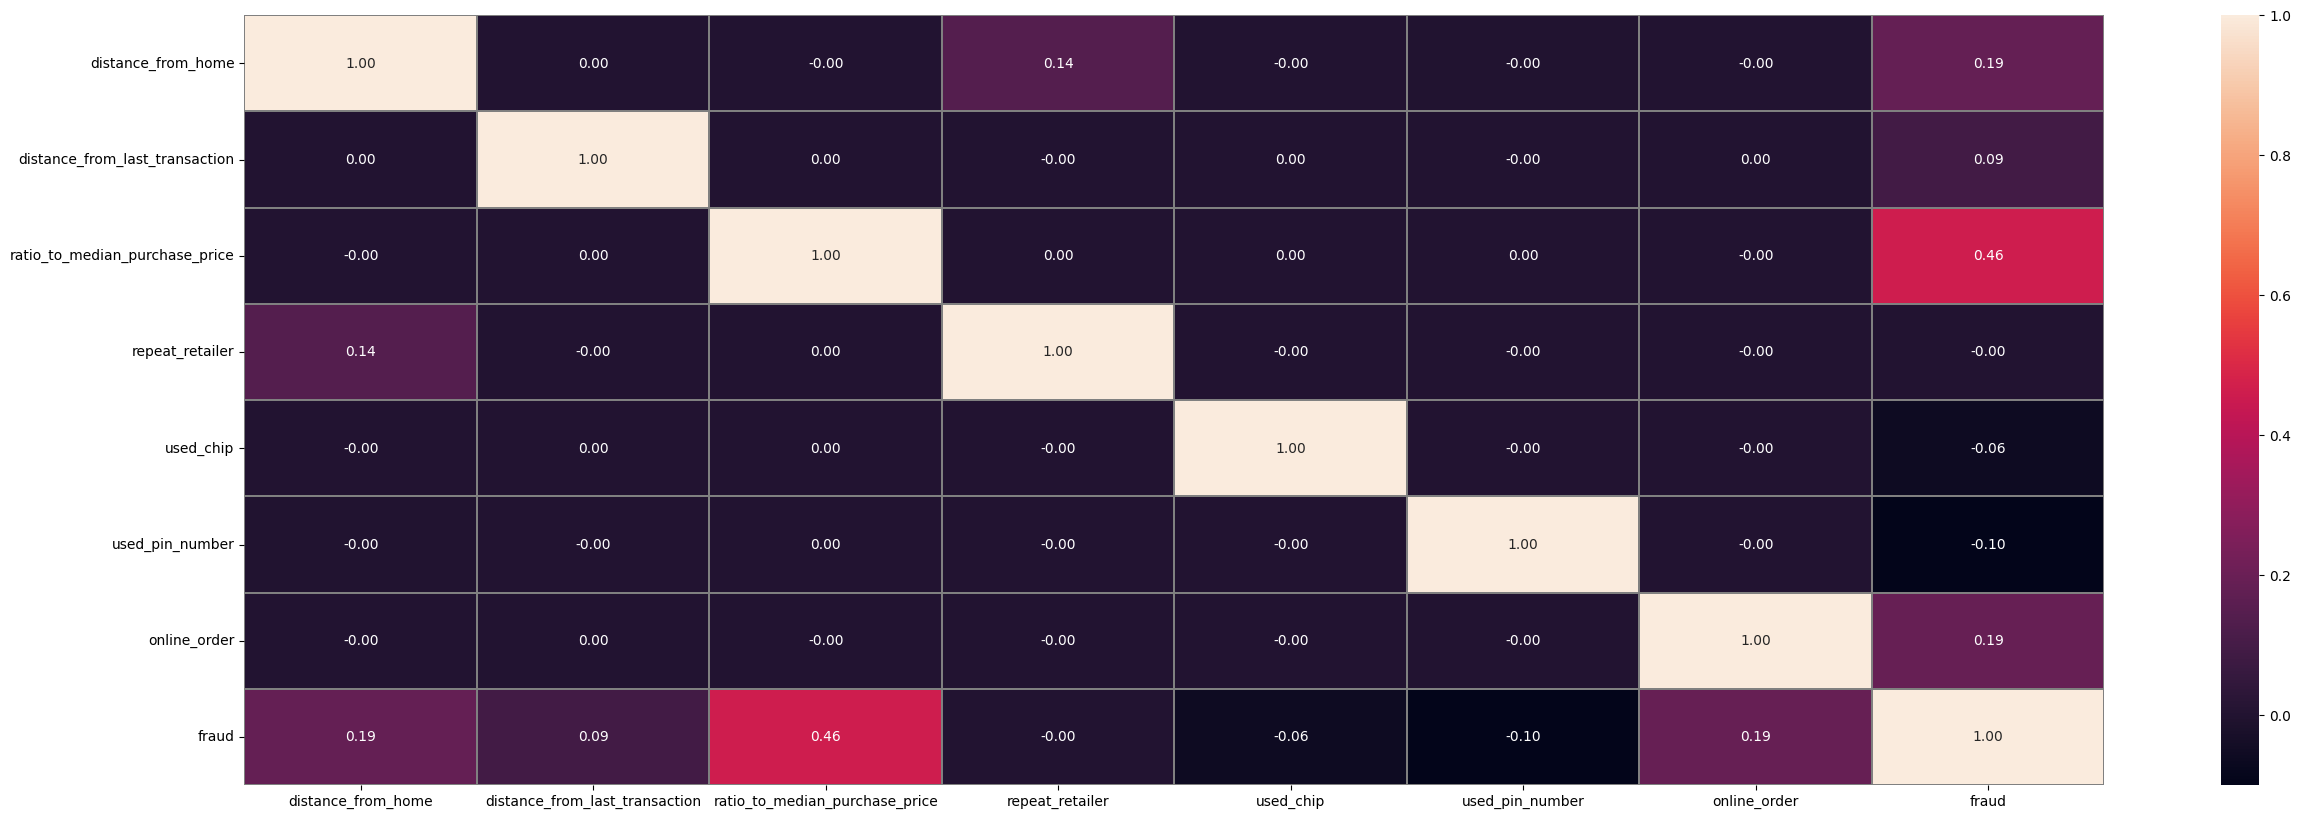

In [92]:
plt.figure(figsize = (30, 10))
sns.heatmap(
    df.corr(),
    annot = True,
    fmt = '.2f',
    linewidths=0.1,
    linecolor='gray',
)

plt.show()
# Table de corrélations à effectuer sur un plus grand échantillon de données

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df[["online_order", "ratio_to_median_purchase_price",
                                                        "distance_from_home"]],
                                                    df.fraud,
                                                    test_size=0.2, random_state=42)

In [94]:
clf = LogisticRegression(random_state=42).fit(x_train, y_train) # .fit charge le modèle en données

In [95]:
clf.predict(x_test) # .predict exécute le modèle de prévision avec les données chargés puis affiche les 10 premiers éléments calculés

array([0., 0., 0., ..., 1., 0., 0.])

In [96]:
clf.score(x_train, y_train) # Score de prévision 0-100

0.94255125

In [97]:
clf.score(x_test, y_test)

0.94272

In [98]:
rf = RandomForestClassifier(n_estimators=25, random_state=42, max_features=2)

In [99]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=25, random_state=42)

In [100]:
rf.score(x_train, y_train)

0.9991025

In [101]:
rf.score(x_test, y_test)

0.971125

In [102]:
pd.DataFrame(rf.feature_importances_, x_train.columns)

,0
online_order,0.198433
ratio_to_median_purchase_price,0.560122
distance_from_home,0.241444


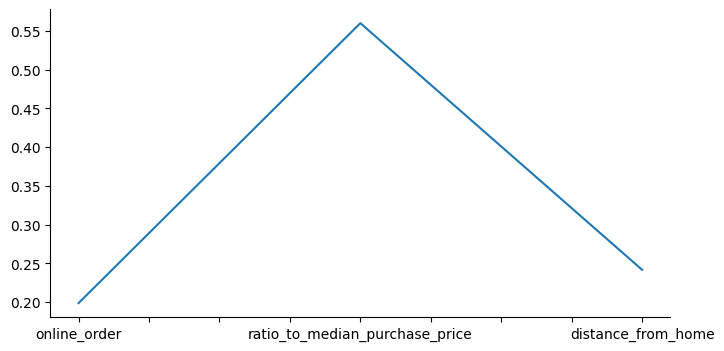

In [103]:
from matplotlib import pyplot as plt
_df_1[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)